# K-means and KNN

Identify a suitable dataset of unlabeled data to perform k-means clustering.
If you choose a labeled dataset, ignore the labels.
Clean, transform, and load.

Perform similar analytical operations as done in class for the Iris dataset (e.g. confusion matrix)
Did the algorithm generate meaningful clusters?
If your dataset was labeled, how well did the clusters match the labels?

After performing k-means clustering, you can then label each data item in your dataset according to the cluster it belongs to.
Split the newly labeled data into training and testing data.
Now use the newly-labeled data to perform k-nearest neighbor classification.
Perform similar analytical operations as done in class for the Digits dataset.
How well do the classifications match the clusters?
Be sure to include your explanation and interpretation of what you observe.

In [44]:
# Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Dataset Info

Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

Data Set Information:
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

Data source: https://archive.ics.uci.edu/ml/datasets/seeds

In [45]:
seeds=pd.read_csv(r"seeds.csv")

In [46]:
seeds.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


###### Clean Transform and Load

In [47]:
seeds=seeds.rename(columns={"Kernel.Width":"width_of_kernel","Kernel.Length":"length_of_kernel","Asymmetry.Coeff":"asymmetry_coefficient","Kernel.Groove":"groove_of_kernel"})
seeds.head()

,Area,Perimeter,Compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,groove_of_kernel,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# K Means Clustering

In [48]:
conditions = [
    (seeds['Type'] == 1),
    (seeds['Type'] == 2),
    (seeds['Type'] == 3)
]
choices = ['A', 'B','C']
seeds['Seed_type'] = np.select(conditions, choices, default='NA')

In [49]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   199 non-null    float64
 1   Perimeter              199 non-null    float64
 2   Compactness            199 non-null    float64
 3   length_of_kernel       199 non-null    float64
 4   width_of_kernel        199 non-null    float64
 5   asymmetry_coefficient  199 non-null    float64
 6   groove_of_kernel       199 non-null    float64
 7   Type                   199 non-null    int64  
 8   Seed_type              199 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 14.1+ KB


### Visualize the dataset

* We need to analyze how individual variables of the dataset relate to each other and if there can be distinct clustered observable from them
* Plotting 7 features of X-ray across the 7

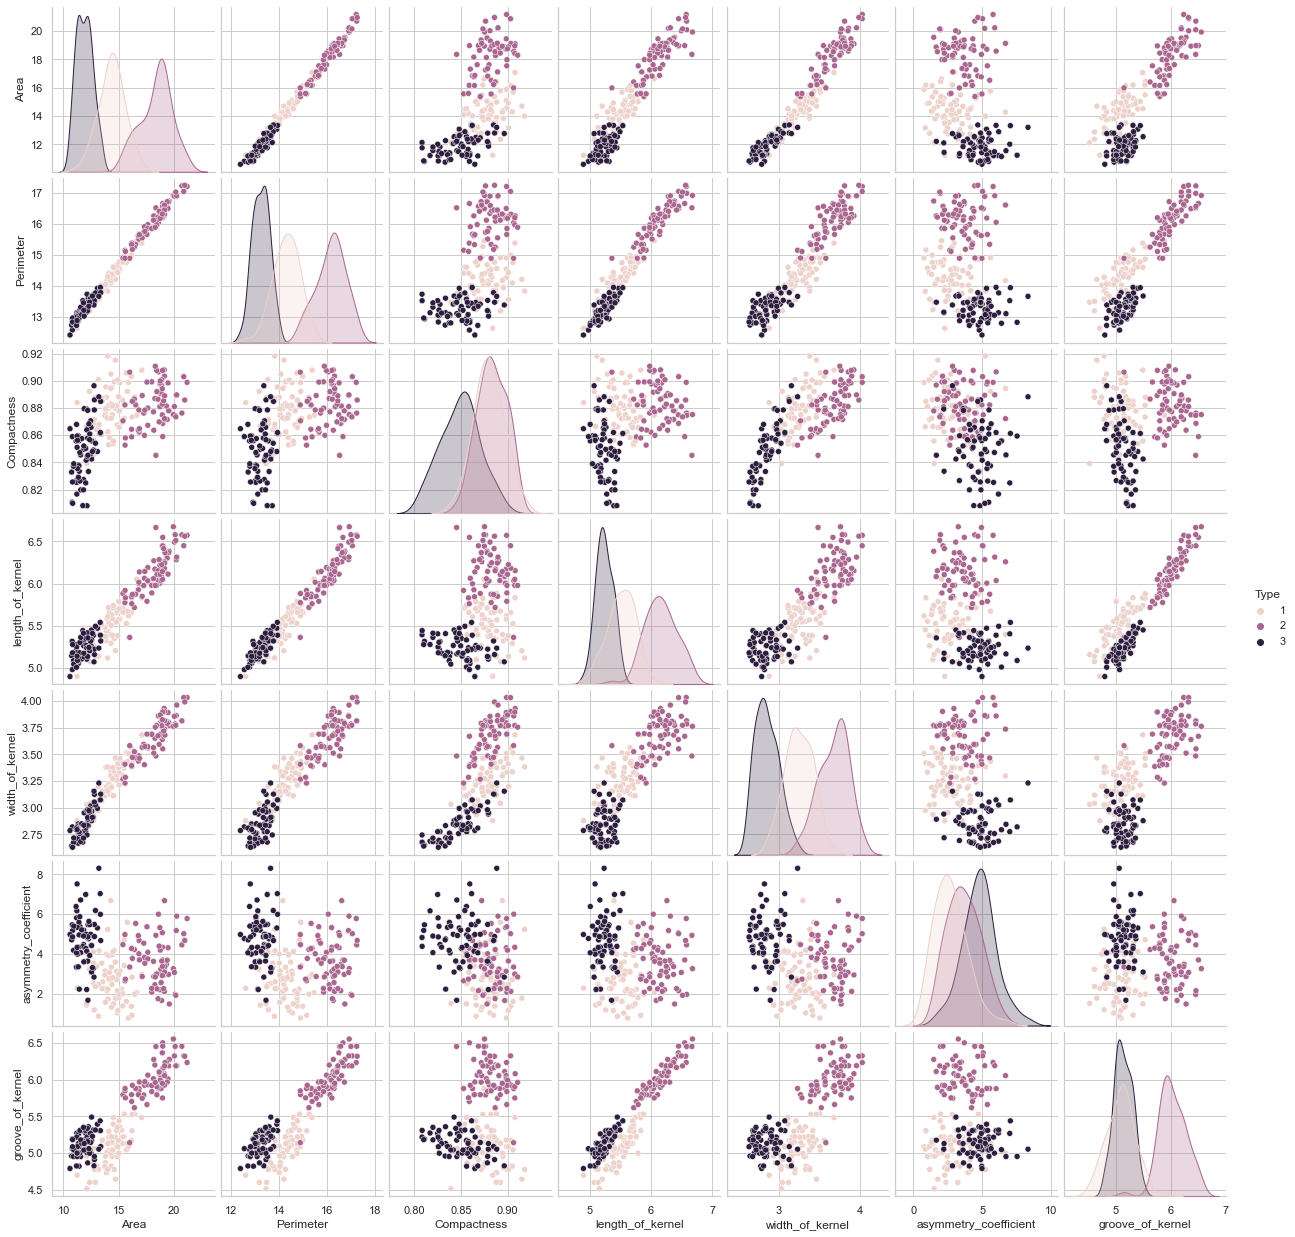

In [50]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=2.6)
sns.set(rc={"figure.figsize":(9, 4)})
sns.set_style('whitegrid')

grid = sns.pairplot(data=seeds, vars=seeds.columns[0:7], hue='Type')

###### Inference from scatter plot:
- Yes, the algorithm generates meaningful clusters
- There seems to be distinct clusters when few variables are considered together
- So, we can go ahead to check further on clustering and compare with the existing labels of the seeds

In [51]:
# Understand the columns of the dataset
seeds.columns

Index(['Area', 'Perimeter', 'Compactness', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coefficient', 'groove_of_kernel', 'Type',
       'Seed_type'],
      dtype='object')

In [52]:
# Select target and other variables
seeds_values=seeds[['Area', 'Perimeter', 'Compactness', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coefficient', 'groove_of_kernel']]

### Create a k-means estimator and fit the model

In [53]:
# Setting 3 clusters because we already know that there are 3 classes of seed types  
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=11)  # find three clusters
kmeans.fit(np.array(seeds_values))

KMeans(n_clusters=3, random_state=11)

* Note: Usually, elbow curve is plotted which requires plotting the explained variation vs the number of clusters
* However, 3 clusters are chosen here because of the knowledge on the dataset (3 types of seeds are present)

### Compare the k-means prediction to the Iris dataset’s target values

In [54]:
label_comparison=pd.DataFrame()
label_comparison['kmeans_clustered']=kmeans.labels_
label_comparison['Actual']=seeds['Seed_type']

In [55]:
# Try checking if the data points are clustered and are in-line with the initially present labels
pd.crosstab(label_comparison['kmeans_clustered'],label_comparison['Actual'])

Actual,A,B,C
kmeans_clustered,,,
0,8,0,64
1,1,59,0
2,57,9,1


### Labelling dataset according to the cluster they belong to the original dataframe
#### To new labels for performing KNN

In [56]:
seeds['kmeans_clustered']=label_comparison['kmeans_clustered']

### Validate the scatter plots using the created cluster output labels

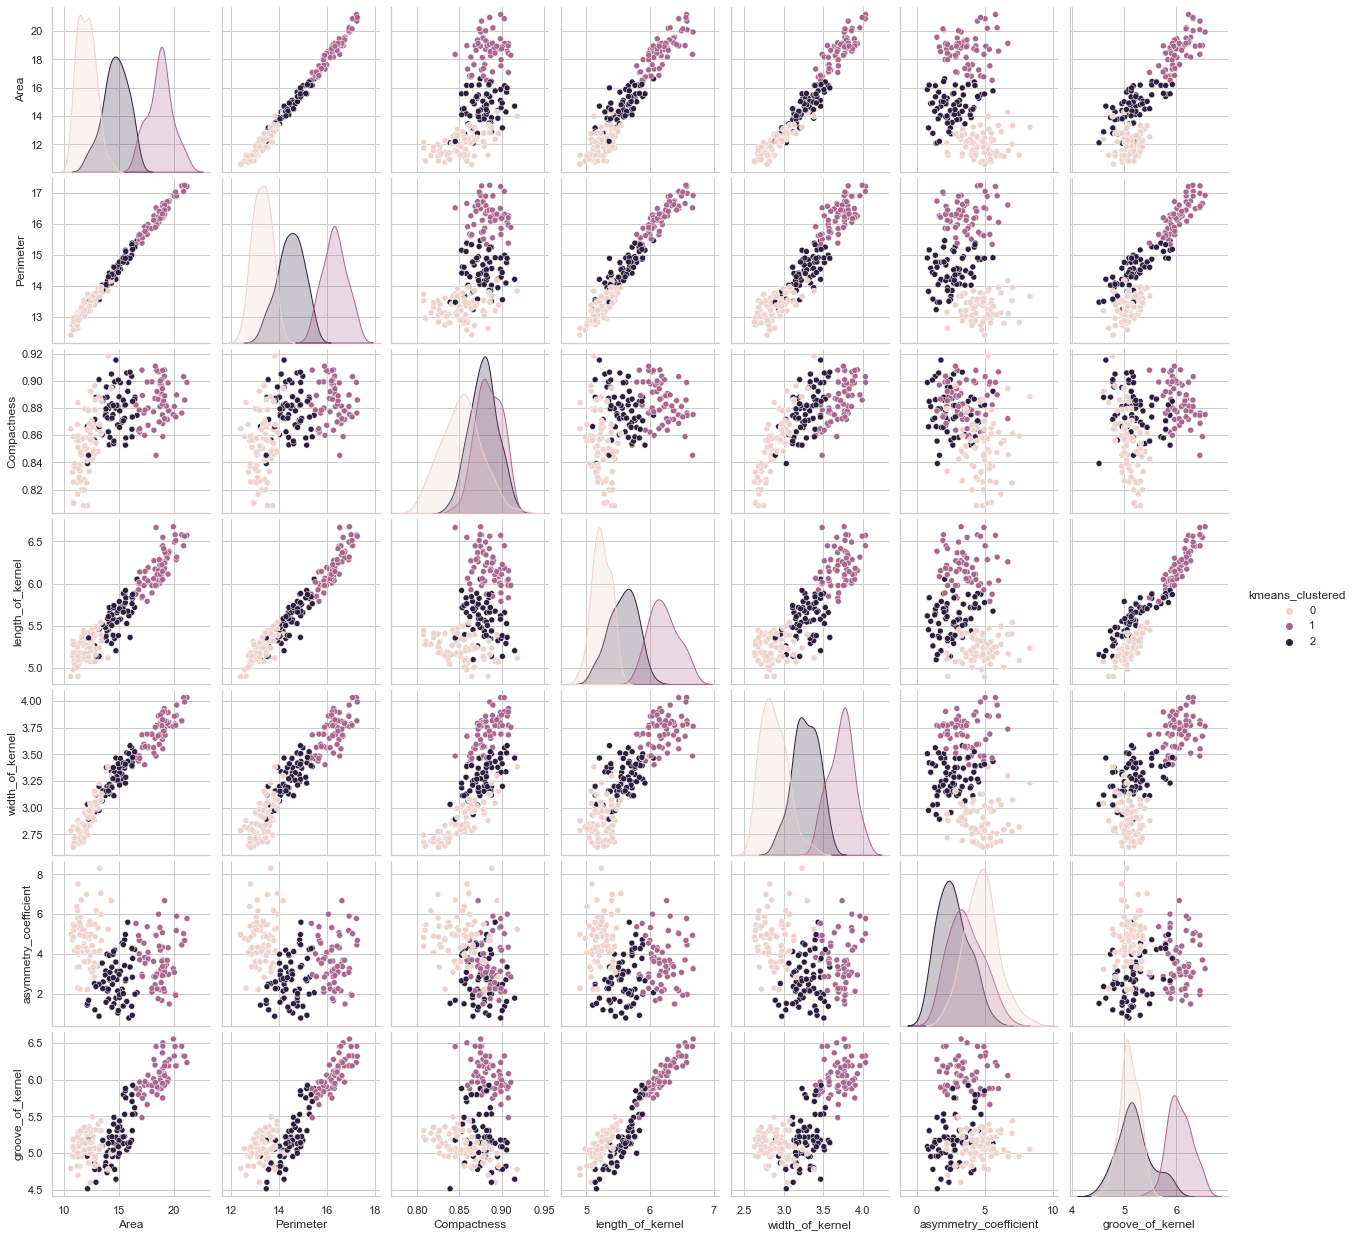

In [57]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=2.6)
sns.set(rc={"figure.figsize":(9, 4)})
sns.set_style('whitegrid')

grid = sns.pairplot(data=seeds, vars=seeds.columns[0:7], hue='kmeans_clustered')

###### Inference from the plotted scatter
- The above scatter plots on the created clusters segregation across multiple available features shows the presence of good clusters

### Inference - How well clusters matched the labels?

Below are the clusters that map corresponding to A,B & C seed types based on the observation from above
 - A-2
 - B-1
 - C-0


# KNN Classification

In [58]:
seeds.head()

,Area,Perimeter,Compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,groove_of_kernel,Type,Seed_type,kmeans_clustered
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,A,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,A,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,A,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,A,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,A,2


In [59]:
print(f"Length of seeds dataset with target: {len(seeds)}")

Length of seeds dataset with target: 199


### Split the data for training and testing

In [60]:
seeds_independent=seeds[['Area', 'Perimeter', 'Compactness', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coefficient', 'groove_of_kernel']]
seeds_dependent=seeds[['kmeans_clustered']]

In [61]:
from sklearn.model_selection import train_test_split

# Spli the data into test and train
X_train, X_test, y_train, y_test = \
    train_test_split(seeds_independent, seeds_dependent, random_state=11)

X_train_array=np.array([np.array(X_train)[i][0] for i in range(0,len(X_train))])
X_test_array=np.array([np.array(X_test)[i][0] for i in range(0,len(X_test))])
y_train_array=np.array([np.array(y_train)[i][0] for i in range(0,len(y_train))])
y_test_array=np.array([np.array(y_test)[i][0] for i in range(0,len(y_test))])

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test_array.shape}')

print()
print(f'y_train.shape = {X_train.shape}')
print(f'y_test.shape  = {y_test_array.shape}')

X_train.shape = (149, 7)
X_test.shape  = (50,)

y_train.shape = (149, 7)
y_test.shape  = (50,)


### Create and train the k-nearest neighbors model

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Consider 5 nearest neighbours as considering an odd and prime number is always better as compared 
# to considering an even number
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X=X_train, y=y_train_array)

KNeighborsClassifier()

### Test the model by predicting seeds classes 

In [63]:
predicted = knn.predict(X=X_test)
expected = y_test_array

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}') 

First twenty predictions:
predicted[:20] = [0 2 0 0 2 2 0 2 1 1 2 1 0 2 2 2 2 0 1 2]
 expected[:20] = [0 2 0 0 2 2 0 2 1 1 2 1 0 2 2 2 2 0 1 2]


### Create and train the k-nearest neighbors model

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train_array)

KNeighborsClassifier()

### Test the model by predicting expected vs predicted in the seed type

In [65]:
predicted = knn.predict(X=X_test)
expected = y_test_array

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}')

First twenty predictions:
predicted[:20] = [0 2 0 0 2 2 0 2 1 1 2 1 0 2 2 2 2 0 1 2]
 expected[:20] = [0 2 0 0 2 2 0 2 1 1 2 1 0 2 2 2 2 0 1 2]


In [66]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(0, 2), (2, 0)]


### Model prediction accuracy

In [67]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 96.00%


### Confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[14  0  1]
 [ 0 13  0]
 [ 1  0 21]]


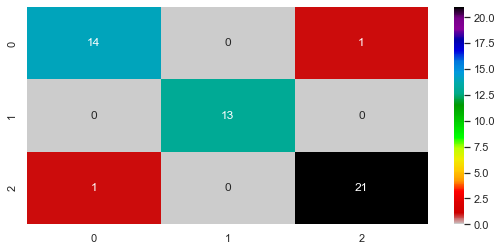

In [69]:
confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

### Classification report

In [70]:
from sklearn.metrics import classification_report

names = [str(seeds) for seeds in [0,1,2]]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      1.00      1.00        13
           2       0.95      0.95      0.95        22

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## Observation & Interpretration

 - The KNN model's accuracy score seems to be 96% (No of correct predictions/total number of predictions) = # predictions our model got right
 - This accuracy is good enough for any future out-sample prediction (Below article shows that minimum of 90% is a good accuracy value https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/#:~:text=The%20most%20common%20metric%20used%20to%20evaluate%20the%20performance%20of,error%20rate%20of%20the%20model.)
 - precision: seems to be >90% for all the target classes, so all the true positives are predicted with good precision 
 
 ###### Conclusion
 - The fit KNN model is good enough for the classification of this dataset
 
 - Extra: Let's observe the accuracy of prediction on doing a preprocessing of reducing the dimensions prior to KNN classification

### Dimensionality reduction with Principal Component Analysis (PCA)

In [71]:
seeds_independent=seeds[['Area', 'Perimeter', 'Compactness', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coefficient', 'groove_of_kernel']]
seeds_dependent=seeds[['kmeans_clustered']]

###### Reducing the 7 features to 3 features by removing the insignificant ones

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=11)  # reduce to two components
pca.fit(seeds_independent)

seeds_independent_reduced = pca.transform(seeds_independent)
seeds_independent.shape


(199, 7)

In [73]:
seeds_independent_reduced = pca.transform(seeds_independent)
seeds_independent=pd.DataFrame(seeds_independent_reduced)

In [74]:
# Spitting to test and train
from sklearn.model_selection import train_test_split

# Spli the data into test and train
X_train, X_test, y_train, y_test = \
    train_test_split(seeds_independent, seeds_dependent, random_state=11)

X_train_array=np.array([np.array(X_train)[i][0] for i in range(0,len(X_train))])
X_test_array=np.array([np.array(X_test)[i][0] for i in range(0,len(X_test))])
y_train_array=np.array([np.array(y_train)[i][0] for i in range(0,len(y_train))])
y_test_array=np.array([np.array(y_test)[i][0] for i in range(0,len(y_test))])

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test_array.shape}')

print()
print(f'y_train.shape = {X_train.shape}')
print(f'y_test.shape  = {y_test_array.shape}')

X_train.shape = (149, 3)
X_test.shape  = (50,)

y_train.shape = (149, 3)
y_test.shape  = (50,)


In [75]:
# Testing the model
from sklearn.neighbors import KNeighborsClassifier

# Consider 5 nearest neighbours as considering an odd and prime number is always better as compared 
# to considering an even number
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X=X_train, y=y_train_array)

KNeighborsClassifier()

In [76]:
# Testing the model
predicted = knn.predict(X=X_test)
expected = y_test_array

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}')

First twenty predictions:
predicted[:20] = [0 2 0 0 2 2 0 2 1 1 2 1 0 2 2 2 2 0 1 2]
 expected[:20] = [0 2 0 0 2 2 0 2 1 1 2 1 0 2 2 2 2 0 1 2]


In [77]:
# Finding the wrong predictions
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(2, 0)]


###### The number of wrong predictions ahs decreased

In [78]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[14  0  1]
 [ 0 13  0]
 [ 0  0 22]]


In [79]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 98.00%


### Observation:

- The accuracy of the KNN classification model has improved from 96% to 98% when doing dimensionality reduction